# Interpreting estimated coefficients

## Assignments

To close out this checkpoint, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question.  For the second two assignments, you'll do your work in Jupyter notebooks.


Please submit links to all your work below. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [these example solutions](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb).

### 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

    * For every child a family has, they spend $223.57 less dollars annually on average
    * Annual income has non-linear relationship with the target expenditure
    * In order to make any sense of this I would need to see more of the data related to the target

### 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
temp_hist = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


temp_hist.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
temp_data = pd.DataFrame()
temp_data['target'] = temp_hist['apparenttemperature'] - temp_hist['temperature']
temp_data['humidity'] = temp_hist['humidity']
temp_data['windspeed'] = temp_hist['windspeed']

In [4]:
# We create a LinearRegression model object
lrm = linear_model.LinearRegression()

# We then select data and target 
data = temp_data.iloc[:, 1:]
target = temp_data['target']

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

# Next we take a look at the results
# We need to manually add a constant in statsmodels' sm
data = sm.add_constant(data)

results = sm.OLS(target, data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:10:52   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the previous checkpoint we determined that the estimated coefficients statistically are significant and the same is true in this case. It's important to point out that the target is temp - apparent_temp and there appears to be less std error in this model than in the last. 

For every unit 1 of humidity there is -3.0292 less in our target and for every unit 1 of windspeed there is -0.0119 less of our target when you add our constant. 

Alturnatively you could describe this relationship as: 

apparenttemperature - temperature = 2.438 + (-3.0292 * humidity) + (-0.1193 * windspeed)

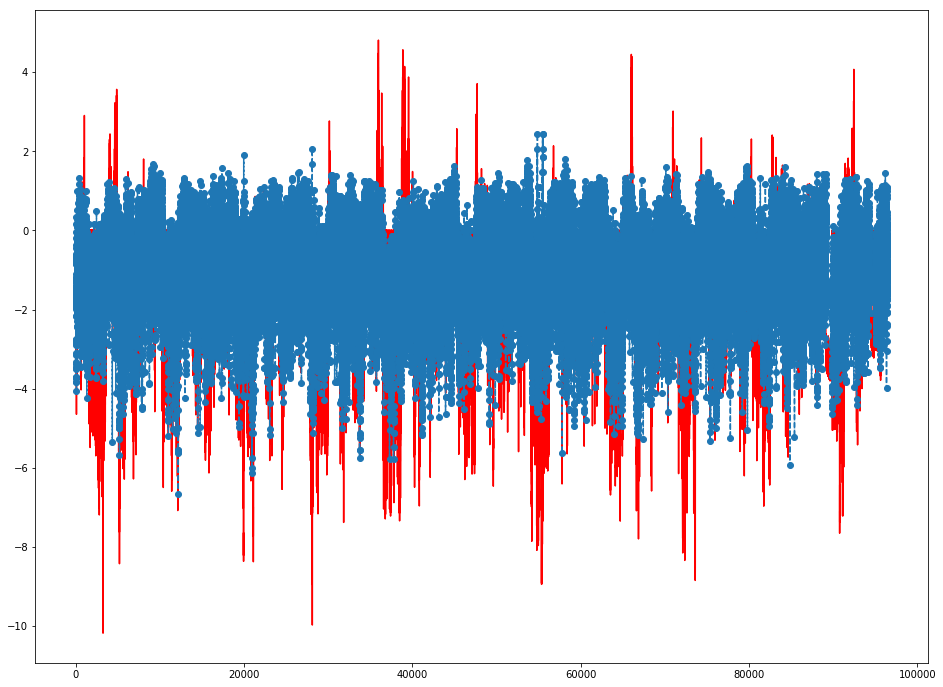

In [33]:
temp_data["new_column"] = 2.4381 + (temp_data.humidity * -3.0292) + (temp_data.windspeed * -0.1193)
plt.figure(figsize=(16,12))
plt.plot(temp_data.target, color='red')
plt.plot(temp_data.new_column, marker='o', linestyle='dashed')
plt.show()

In [5]:
# First select data and target 
data2 = temp_data.iloc[:, 1:]
data2['humidity_windspeed'] = temp_hist['humidity'] * temp_hist['windspeed']
target = temp_data['target']

# We create a LinearRegression model object
lrm = linear_model.LinearRegression()

# We need to manually add a constant in statsmodels' sm
data2 = sm.add_constant(data2)

# fit method estimates the coefficients using OLS
lrm.fit(data2, target)

results = sm.OLS(target, data2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:10:52   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0839      0.033      2.511      0.012       0.018       0.149
humidity               0.1775      0.043      4.133      0.000       0.093       0.262
windspeed              0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the coefficients remain statistically significant. The coefficients have flipped from negative to positive. The interaction feature has a negative coefficient. 

You could describe this relationship as: 

apparenttemperature - temperature = 0.0839 + (0.1775 * humidity) + (0.905 * windspeed) + (interaction * -0.2971)

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
homes_df = pd.read_sql_query('select * from houseprices',con=engine)

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
homes_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [7]:
# Preparing data for modeling about house prices 

# ojects holding columns
non_numeric_columns = homes_df.select_dtypes(['object']).columns
numeric_columns = homes_df.select_dtypes(['int64', 'float64']).columns

# dropping columns Missing data
homes_df = homes_df.drop(['poolqc', 'miscfeature', 'alley', 
                          'fence', 'fireplacequ', 'lotfrontage'], axis=1)

# Dropping missing observations
homes_df = homes_df.dropna(axis=0)

numeric_columns = numeric_columns.drop(['id'])

FILL_LIST = []
for cols in homes_df[:]:
    if cols in numeric_columns:
        FILL_LIST.append(cols)

In [8]:
from scipy.stats.mstats import winsorize

homes_win = homes_df.copy()

for col in FILL_LIST:
    homes_win[col] = winsorize(homes_win[col], (.05, .14))

In [9]:
from sklearn import preprocessing

def cat_converter(df):
    for cols in df:
        if cols in non_numeric_columns:
            
            # Create a label (category) encoder object
            le = preprocessing.LabelEncoder()
            
            # Create a label (category) encoder object
            le.fit(df[cols])
            
            # Apply the fitted encoder to the pandas column
            df[cols] = le.transform(df[cols]) 
    return df

cat_converter(homes_win)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,13518,1,0,3,0,2,0,...,0,0,0,0,0,10,2008,8,4,250000
5,6,50,3,13518,1,0,3,0,4,0,...,0,0,0,0,0,10,2009,8,4,143000
6,7,20,3,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,261500
7,8,60,3,10382,1,0,3,0,0,0,...,0,0,0,0,0,10,2009,8,4,200000
8,9,50,4,6120,1,3,3,0,4,0,...,0,0,0,0,0,4,2008,8,0,129900
9,10,90,3,7420,1,3,3,0,0,0,...,0,0,0,0,0,2,2008,8,4,118000


In [10]:
# selecting data and target
homes_mod1 = homes_win[['lotarea', 'bsmtfinsf1', 'secondflrsf', 'grlivarea', 'saleprice']]


In [11]:
homes_mod1.head()

,lotarea,bsmtfinsf1,secondflrsf,grlivarea,saleprice
0,8450,706,854,1710,208500
1,9600,978,0,1262,181500
2,11250,486,866,1786,223500
3,9550,216,756,1717,140000
4,13518,655,882,2036,250000


In [12]:
# We create a LinearRegression model object
lrm = linear_model.LinearRegression()

data = homes_mod1.iloc[:, :-1]
target = homes_mod1['saleprice']

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

# We need to manually add a constant
# in statsmodels' sm
data = sm.add_constant(data)

results = sm.OLS(target, data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     567.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          5.78e-286
Time:                        14:10:56   Log-Likelihood:                -15753.
No. Observations:                1338   AIC:                         3.152e+04
Df Residuals:                    1333   BIC:                         3.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5339.7619   4060.975     -1.315      0.189   -1.33e+04    2626.837
lotarea         1.1096      0.338      3.286      0.001       0.447       1.772
bsmtfinsf1     21.9535      2.479      8.856      0.000      17.091      26.817
secondflrsf   -34.5259      3.119    -11.070      0.000     -40.644     -28.408
grlivarea     117.3872      3.361     34.929      0.000     110.794     123.980
==============================================================================
Omnibus:                       86.351   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.815
Skew:                          -0.593   Prob(JB):                     2.35e-24
Kurtosis:                       3.738   Cond. No.                     4.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

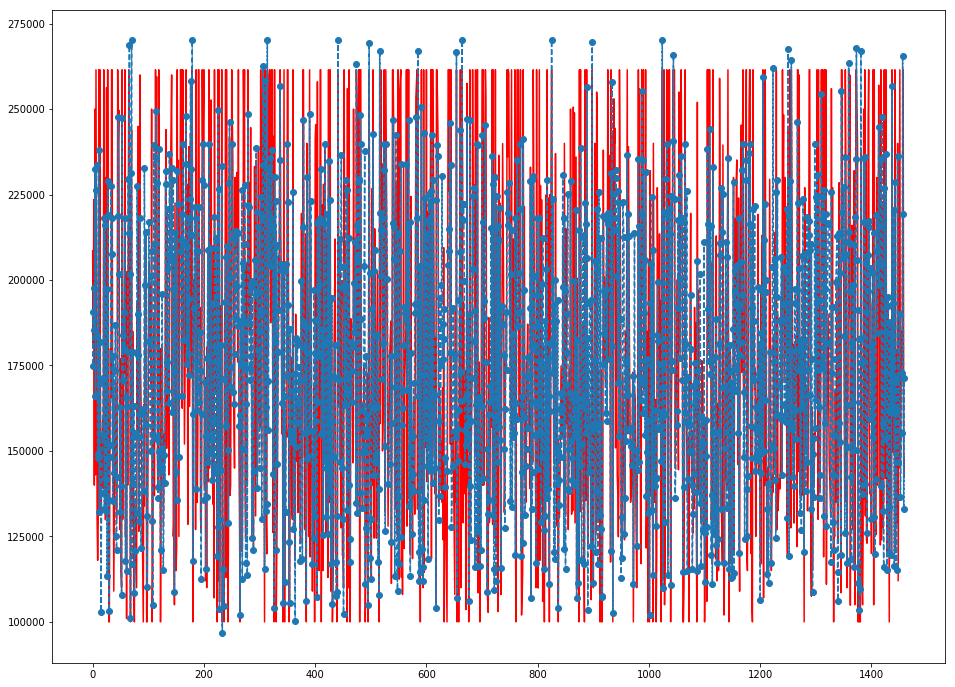

In [32]:
homes_mod1["new_column"] = -5339.76 + (homes_mod1.lotarea * 1.1096) + (homes_mod1.bsmtfinsf1 * 21.9535) + (homes_mod1.secondflrsf * -34.5259) + (homes_mod1.grlivarea * 117.3872)
plt.figure(figsize=(16,12))
plt.plot(homes_mod1.saleprice, color='red')
plt.plot(homes_mod1.new_column, marker='o', linestyle='dashed')
plt.show()

All of the variables used are significant to the target. 

The relationships between features, coefficients, and the target can be described as such:

saleprice = -5339.76 + (lotarea	* 1.1096) + (bsmtfinsf1	* 21.9535) + (secondflrsf * -34.5259) + (grlivarea * 117.3872)

*** Note we must make sure our conditions hold as multicollinearity is a problem for OLS. 

The constant's coefficient's p-values seems to be a bit high compared to our first evaluation, removing a variable due to multicollinearity may adjust this. It makes since that all the variables seems to be significant based on the chi-squared test I used to pick variables. 